# Graph embedding using [DeepWalk](https://arxiv.org/pdf/1403.6652.pdf) and[ node2vec](https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.decomposition import PCA

from graph_embedding_continuity import *

In [2]:
N = 20

N_TRAIN = 100
EMBEDDING_SIZE = 4
WALK_LENGTH = 10
WINDOW_SIZE = 2
N_NEG = 2
HIDDEN_SIZE = 16

USE_CUDA = False
USE_PCA_TO_PLOT = True

## Embedding under closing of a loop.

Closing the loop greatly change the diffusion of the random walk. Empirically, this generates significantly different embeddings for the chain and the cycle.

In [3]:
chain = generate_chain(N)
cycle = generate_cycle(N)

# add some random weights on each edge,
# same weight for the edges common to
# the chain and the cycle.
shared_weights = np.random.rand(N-1)

for v, _ in chain.edges():
    chain[v][v+1]['weight'] = shared_weights[v]
    cycle[v][v+1]['weight'] = shared_weights[v]

# put a tiny weight on the closing edge of the cycle.
cycle[N-1][0]['weight'] = 0.1*np.random.rand()

# save layout
pos = nx.shell_layout(cycle)

### Deepwalk

Epoch : 1/100: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 40.3it/s, loss=51.1]
Epoch : 10/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 41.0it/s, loss=50.9]
Epoch : 20/100: 100%|███████████████████████████████████| 20.0/20.0 [00:00<00:00, 41.0it/s, loss=48]
Epoch : 30/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 41.5it/s, loss=42.2]
Epoch : 40/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 40.7it/s, loss=33.7]
Epoch : 50/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 40.4it/s, loss=28.6]
Epoch : 60/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 40.7it/s, loss=26.4]
Epoch : 70/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 40.3it/s, loss=24.3]
Epoch : 80/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 40.9it/s, loss=24.5]
Epoch : 90/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 40.7it/s, l

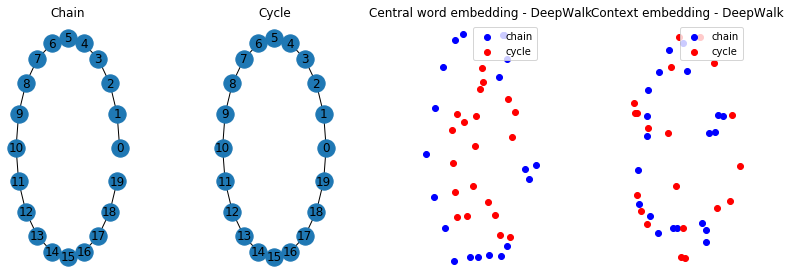

In [4]:
emb_chain_word, emb_chain_context = deepwalk_embedding(chain,
                                                       k=EMBEDDING_SIZE,
                                                       n_train=N_TRAIN,
                                                       walk_length=WALK_LENGTH,
                                                       window_size=WINDOW_SIZE,
                                                       n_neg=N_NEG,
                                                       hidden_size = HIDDEN_SIZE,
                                                       use_cuda=USE_CUDA,
                                                      )

emb_cycle_word, emb_cycle_context = deepwalk_embedding(cycle,
                                                       k=EMBEDDING_SIZE,
                                                       n_train=N_TRAIN,
                                                       walk_length=WALK_LENGTH,
                                                       window_size=WINDOW_SIZE,
                                                       n_neg=N_NEG,
                                                       hidden_size = HIDDEN_SIZE,
                                                       use_cuda=USE_CUDA,
                                                      )

if USE_PCA_TO_PLOT:
    # extract 2 principal components to plot
    pca = PCA(n_components=2)
    emb_chain_word = pca.fit_transform(emb_chain_word.cpu())
    emb_chain_context = pca.fit_transform(emb_chain_context.cpu())
    emb_cycle_word = pca.fit_transform(emb_cycle_word.cpu())
    emb_cycle_context = pca.fit_transform(emb_cycle_context.cpu())

# plot the graph
fig, axes = plt.subplots(figsize=(11,4), nrows=1, ncols=4)

ax = axes[0]
nx.draw_networkx(chain, pos = pos, ax=ax)
ax.set_title('Chain')
ax.axis('off')
    
ax = axes[1]
nx.draw_networkx(cycle, pos = pos, ax=ax)
ax.set_title('Cycle')
ax.axis('off')

ax = axes[2]
ax.scatter(emb_chain_word[:, 0], emb_chain_word[:, 1], label='chain', color='b')
ax.scatter(emb_cycle_word[:, 0], emb_cycle_word[:, 1], label='cycle', color='r')
ax.set_title('Central word embedding - DeepWalk')
ax.legend(loc='upper right')
ax.axis('off')

ax = axes[3]
ax.scatter(emb_chain_context[:, 0], emb_chain_context[:, 1], label='chain', color='b')
ax.scatter(emb_cycle_context[:, 0], emb_cycle_context[:, 1], label='cycle', color='r')
ax.set_title('Context embedding - DeepWalk')
ax.legend(loc='upper right')
ax.axis('off')

plt.tight_layout()
plt.show()

### node2vec

### depth-first incentive

Epoch : 1/100: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 40.9it/s, loss=51.2]
Epoch : 10/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 39.6it/s, loss=50.7]
Epoch : 20/100: 100%|███████████████████████████████████| 20.0/20.0 [00:00<00:00, 39.4it/s, loss=45]
Epoch : 30/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 40.9it/s, loss=34.4]
Epoch : 40/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 40.0it/s, loss=28.1]
Epoch : 50/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 39.3it/s, loss=29.3]
Epoch : 60/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 40.1it/s, loss=24.5]
Epoch : 70/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 40.8it/s, loss=21.7]
Epoch : 80/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 39.9it/s, loss=23.1]
Epoch : 90/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 39.5it/s, l

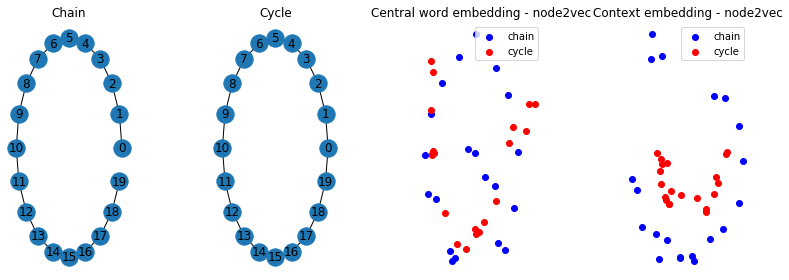

In [5]:
p = 2.0
q = 0.5

emb_chain_word, emb_chain_context = node2vec_embedding(chain,
                                                       p=p,
                                                       q=q,
                                                       k=EMBEDDING_SIZE,
                                                       n_train=N_TRAIN,
                                                       walk_length=WALK_LENGTH,
                                                       window_size=WINDOW_SIZE,
                                                       n_neg=N_NEG,
                                                       hidden_size = HIDDEN_SIZE,
                                                       use_cuda=USE_CUDA,
                                                      )

emb_cycle_word, emb_cycle_context = node2vec_embedding(cycle,
                                                       p=p,
                                                       q=q,
                                                       k=EMBEDDING_SIZE,
                                                       n_train=N_TRAIN,
                                                       walk_length=WALK_LENGTH,
                                                       window_size=WINDOW_SIZE,
                                                       n_neg=N_NEG,
                                                       hidden_size = HIDDEN_SIZE,
                                                       use_cuda=USE_CUDA,
                                                      )

if USE_PCA_TO_PLOT:
    # extract 2 principal components to plot
    pca = PCA(n_components=2)
    emb_chain_word = pca.fit_transform(emb_chain_word.cpu())
    emb_chain_context = pca.fit_transform(emb_chain_context.cpu())
    emb_cycle_word = pca.fit_transform(emb_cycle_word.cpu())
    emb_cycle_context = pca.fit_transform(emb_cycle_context.cpu())

# plot the graph
fig, axes = plt.subplots(figsize=(11,4), nrows=1, ncols=4)

ax = axes[0]
nx.draw_networkx(chain, pos = pos, ax=ax)
ax.set_title('Chain')
ax.axis('off')
    
ax = axes[1]
nx.draw_networkx(cycle, pos = pos, ax=ax)
ax.set_title('Cycle')
ax.axis('off')

ax = axes[2]
ax.scatter(emb_chain_word[:, 0], emb_chain_word[:, 1], label='chain', color='b')
ax.scatter(emb_cycle_word[:, 0], emb_cycle_word[:, 1], label='cycle', color='r')
ax.set_title('Central word embedding - node2vec')
ax.legend(loc='upper right')
ax.axis('off')

ax = axes[3]
ax.scatter(emb_chain_context[:, 0], emb_chain_context[:, 1], label='chain', color='b')
ax.scatter(emb_cycle_context[:, 0], emb_cycle_context[:, 1], label='cycle', color='r')
ax.set_title('Context embedding - node2vec')
ax.legend(loc='upper right')
ax.axis('off')

plt.tight_layout()
plt.show()

### breadth-first incentive

Epoch : 1/100: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 38.9it/s, loss=51.5]
Epoch : 10/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 39.2it/s, loss=50.9]
Epoch : 20/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 39.0it/s, loss=49.4]
Epoch : 30/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 39.6it/s, loss=38.4]
Epoch : 40/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 39.8it/s, loss=32.5]
Epoch : 50/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 39.5it/s, loss=30.5]
Epoch : 60/100: 100%|███████████████████████████████████| 20.0/20.0 [00:00<00:00, 39.2it/s, loss=26]
Epoch : 70/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 39.7it/s, loss=27.6]
Epoch : 80/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 39.2it/s, loss=25.8]
Epoch : 90/100: 100%|█████████████████████████████████| 20.0/20.0 [00:00<00:00, 39.8it/s, l

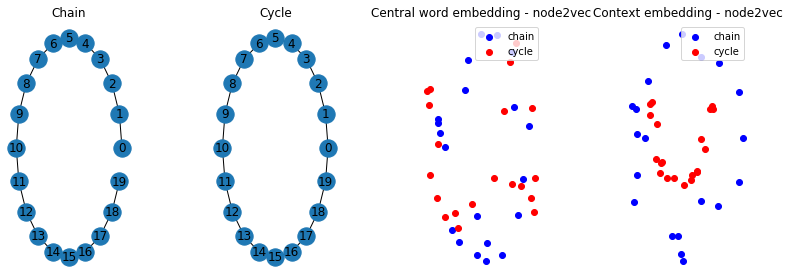

In [6]:
p = 0.5
q = 2.0

emb_chain_word, emb_chain_context = node2vec_embedding(chain,
                                                       p=p,
                                                       q=q,
                                                       k=EMBEDDING_SIZE,
                                                       n_train=N_TRAIN,
                                                       walk_length=WALK_LENGTH,
                                                       window_size=WINDOW_SIZE,
                                                       n_neg=N_NEG,
                                                       hidden_size = HIDDEN_SIZE,
                                                       use_cuda=USE_CUDA,
                                                      )

emb_cycle_word, emb_cycle_context = node2vec_embedding(cycle,
                                                       p=p,
                                                       q=q,
                                                       k=EMBEDDING_SIZE,
                                                       n_train=N_TRAIN,
                                                       walk_length=WALK_LENGTH,
                                                       window_size=WINDOW_SIZE,
                                                       n_neg=N_NEG,
                                                       hidden_size = HIDDEN_SIZE,
                                                       use_cuda=USE_CUDA,
                                                      )

if USE_PCA_TO_PLOT:
    # extract 2 principal components to plot
    pca = PCA(n_components=2)
    emb_chain_word = pca.fit_transform(emb_chain_word.cpu())
    emb_chain_context = pca.fit_transform(emb_chain_context.cpu())
    emb_cycle_word = pca.fit_transform(emb_cycle_word.cpu())
    emb_cycle_context = pca.fit_transform(emb_cycle_context.cpu())

# plot the graph
fig, axes = plt.subplots(figsize=(11,4), nrows=1, ncols=4)

ax = axes[0]
nx.draw_networkx(chain, pos = pos, ax=ax)
ax.set_title('Chain')
ax.axis('off')
    
ax = axes[1]
nx.draw_networkx(cycle, pos = pos, ax=ax)
ax.set_title('Cycle')
ax.axis('off')

ax = axes[2]
ax.scatter(emb_chain_word[:, 0], emb_chain_word[:, 1], label='chain', color='b')
ax.scatter(emb_cycle_word[:, 0], emb_cycle_word[:, 1], label='cycle', color='r')
ax.set_title('Central word embedding - node2vec')
ax.legend(loc='upper right')
ax.axis('off')

ax = axes[3]
ax.scatter(emb_chain_context[:, 0], emb_chain_context[:, 1], label='chain', color='b')
ax.scatter(emb_cycle_context[:, 0], emb_cycle_context[:, 1], label='cycle', color='r')
ax.set_title('Context embedding - node2vec')
ax.legend(loc='upper right')
ax.axis('off')

plt.tight_layout()
plt.show()

### Deepwalk with longer walks

Epoch : 1/100: 100%|███████████████████████████████████| 20.0/20.0 [00:01<00:00, 13.8it/s, loss=162]
Epoch : 10/100: 100%|██████████████████████████████████| 20.0/20.0 [00:01<00:00, 13.9it/s, loss=159]
Epoch : 20/100: 100%|██████████████████████████████████| 20.0/20.0 [00:01<00:00, 14.0it/s, loss=118]
Epoch : 30/100: 100%|███████████████████████████████████| 20.0/20.0 [00:01<00:00, 14.8it/s, loss=94]
Epoch : 40/100: 100%|█████████████████████████████████| 20.0/20.0 [00:01<00:00, 14.7it/s, loss=83.5]
Epoch : 50/100: 100%|█████████████████████████████████| 20.0/20.0 [00:01<00:00, 14.3it/s, loss=78.2]
Epoch : 60/100: 100%|█████████████████████████████████| 20.0/20.0 [00:01<00:00, 14.8it/s, loss=73.9]
Epoch : 70/100: 100%|███████████████████████████████████| 20.0/20.0 [00:01<00:00, 14.4it/s, loss=76]
Epoch : 80/100: 100%|█████████████████████████████████| 20.0/20.0 [00:01<00:00, 14.8it/s, loss=71.7]
Epoch : 90/100: 100%|█████████████████████████████████| 20.0/20.0 [00:01<00:00, 14.7it/s, l

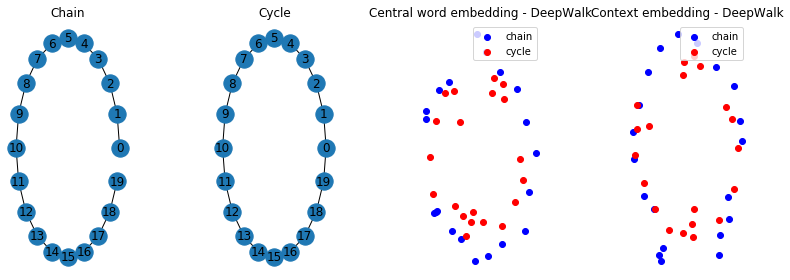

In [7]:
emb_chain_word, emb_chain_context = deepwalk_embedding(chain,
                                                       k=EMBEDDING_SIZE,
                                                       n_train=N_TRAIN,
                                                       walk_length=WALK_LENGTH*3,
                                                       window_size=WINDOW_SIZE,
                                                       n_neg=N_NEG,
                                                       hidden_size = HIDDEN_SIZE,
                                                       use_cuda=USE_CUDA,
                                                      )

emb_cycle_word, emb_cycle_context = deepwalk_embedding(cycle,
                                                       k=EMBEDDING_SIZE,
                                                       n_train=N_TRAIN,
                                                       walk_length=WALK_LENGTH*3,
                                                       window_size=WINDOW_SIZE,
                                                       n_neg=N_NEG,
                                                       hidden_size = HIDDEN_SIZE,
                                                       use_cuda=USE_CUDA,
                                                      )

if USE_PCA_TO_PLOT:
    # extract 2 principal components to plot
    pca = PCA(n_components=2)
    emb_chain_word = pca.fit_transform(emb_chain_word.cpu())
    emb_chain_context = pca.fit_transform(emb_chain_context.cpu())
    emb_cycle_word = pca.fit_transform(emb_cycle_word.cpu())
    emb_cycle_context = pca.fit_transform(emb_cycle_context.cpu())

# plot the graph
fig, axes = plt.subplots(figsize=(11,4), nrows=1, ncols=4)

ax = axes[0]
nx.draw_networkx(chain, pos = pos, ax=ax)
ax.set_title('Chain')
ax.axis('off')

ax = axes[1]
nx.draw_networkx(cycle, pos = pos, ax=ax)
ax.set_title('Cycle')
ax.axis('off')

ax = axes[2]
ax.scatter(emb_chain_word[:, 0], emb_chain_word[:, 1], label='chain', color='b')
ax.scatter(emb_cycle_word[:, 0], emb_cycle_word[:, 1], label='cycle', color='r')
ax.set_title('Central word embedding - DeepWalk')
ax.legend(loc='upper right')
ax.axis('off')

ax = axes[3]
ax.scatter(emb_chain_context[:, 0], emb_chain_context[:, 1], label='chain', color='b')
ax.scatter(emb_cycle_context[:, 0], emb_cycle_context[:, 1], label='cycle', color='r')
ax.set_title('Context embedding - DeepWalk')
ax.legend(loc='upper right')
ax.axis('off')

plt.tight_layout()
plt.show()